In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

print("Libraries imported successfully.")

Libraries imported successfully.


In [3]:
df = pd.read_csv("F:/medical-cost-descriptive-stats/Data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(f"Dataset shape: {df.shape}")
print("\n column Types: ")
print(df.dtypes)


Dataset shape: (1338, 7)

 column Types: 
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [5]:
print("\nMissing values:")


Missing values:


In [6]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [7]:
#mean
print("Mean ")
print(f"Age: {df['age'].mean():.2f}")
print(f"BMI: {df['bmi'].mean():.2f}")
print(f"Charges: {df['charges'].mean():.2f}")

Mean 
Age: 39.21
BMI: 30.66
Charges: 13270.42


In [8]:
#median
print("Median")
print(f"Age: {df['age'].median():.2f}")
print(f"BMI: {df['bmi'].median():.2f}")
print(f"Charges: {df['charges'].median():.2f}")

Median
Age: 39.00
BMI: 30.40
Charges: 9382.03


In [9]:
#mode
print("Mode")
print("Age:", df['age'].mode()[0])
print("BMI:", df['bmi'].mode()[0])
print("Charges:", df['charges'].mode()[0])
print("Smoker:", df['smoker'].mode()[0])
print("Region:", df['region'].mode()[0])

Mode
Age: 18
BMI: 32.3
Charges: 1639.5631
Smoker: no
Region: southeast


### 🧠 Observations:
- Mean > Median for `charges` → Right-skewed distribution (outliers with very high cost)
- Mode of `smoker` is **'no'**, meaning most people are non-smokers
- Mode of `age` is **18**, suggesting many young individuals in the data

**➡ Median is more reliable for skewed data like charges**

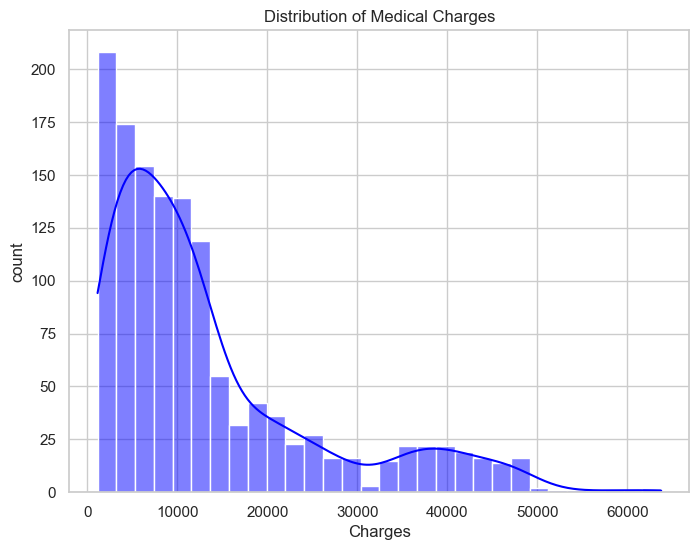

In [10]:
#Histogram of charges
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('count')
plt.show()


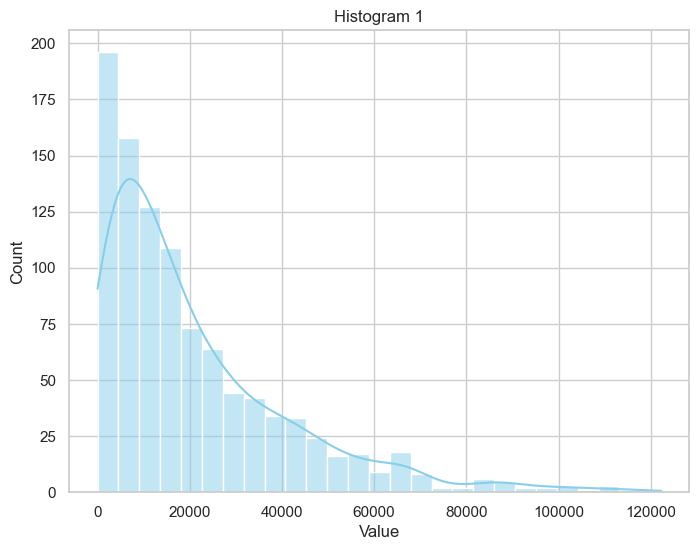

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated income-like data (skewed)
data1 = np.random.exponential(scale=20000, size=1000)
sns.histplot(data1, kde=True, color='skyblue')
plt.title('Histogram 1')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()


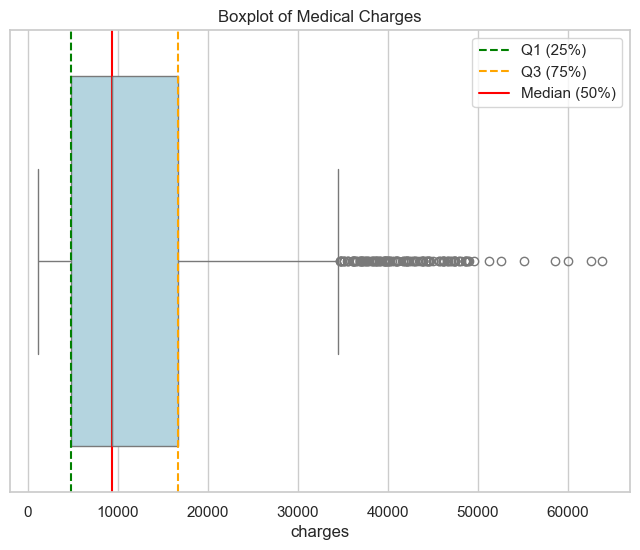

In [17]:
sns.boxplot(x=df['charges'], color='lightblue')
plt.title('Boxplot of Medical Charges')

# Annotate percentiles on plot
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
median = df['charges'].median()
IQR = Q3 - Q1

plt.axvline(Q1, color='green', linestyle='--', label='Q1 (25%)')
plt.axvline(Q3, color='orange', linestyle='--', label='Q3 (75%)')
plt.axvline(median, color='red', linestyle='-', label='Median (50%)')

plt.legend()
plt.show()


Taking one group at a time helps me analyze and visually identify which group has more outliers and which group might influence the model more strongly.
This step is useful to understand how different features impact the data and what adjustments might be needed before modeling.

taking smokers vs non-smokers

In [13]:
# Range
range_value = df['charges'].max() - df['charges'].min()
print(f"Range: {range_value:.2f}")

# IQR
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR (Interquartile Range): {IQR:.2f}")

# Standard Deviation
print(f"Standard Deviation: {df['charges'].std():.2f}")

# Variance (optional)
print(f"Variance: {df['charges'].var():.2f}")


Range: 62648.55
Q1: 4740.29
Q3: 16639.91
IQR (Interquartile Range): 11899.63
Standard Deviation: 12110.01
Variance: 146652372.15


In [18]:
# Group-wise mean and median
charges_by_smoker = df.groupby('smoker')['charges'].agg(['mean', 'median', 'count']).round(2)
charges_by_smoker


,mean,median,count
smoker,,,
no,8434.27,7345.41,1064
yes,32050.23,34456.35,274


The count of smokers vs non-smokers is very **imbalanced** — non-smokers are around 4 times more than smokers.
Even though smokers have much higher medical charges, the model might not learn this well because the data is biased toward non-smokers.
This imbalance can lead to the model underestimating the effect of smoking on charges, since it sees fewer smoker examples during training.
That’s why it’s important to analyze group counts early — to decide if techniques like resampling or weighting are needed before modeling.
**smoker                         mean	                                           median	                                  count**
no	                          8434.27	                                       7345.41	                                   1064
yes	                          32050.23	                                       34456.35	                                   274

C:\Users\DELL\AppData\Local\Temp\ipykernel_5352\2808732658.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')


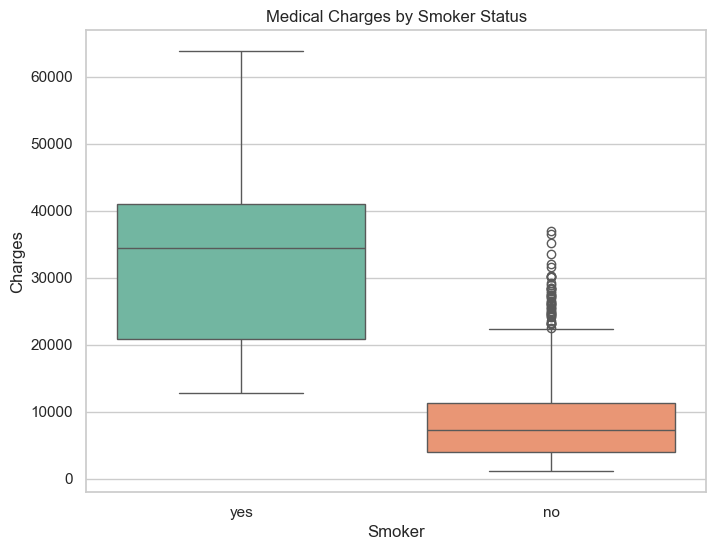

In [19]:
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Medical Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5352\2526582441.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='cool')


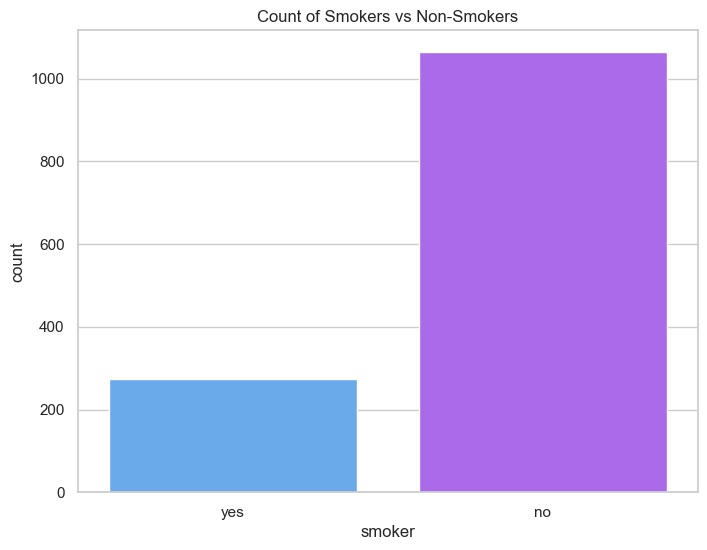

In [20]:
sns.countplot(x='smoker', data=df, palette='cool')
plt.title('Count of Smokers vs Non-Smokers')
plt.show()


In [21]:
# Calculate IQR for charges overall
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Outlier threshold
upper_bound = Q3 + 1.5 * IQR

# Count of outliers per smoker group
outliers = df[df['charges'] > upper_bound]
outliers_by_smoker = outliers['smoker'].value_counts()
outliers_by_smoker


smoker
yes    136
no       3
Name: count, dtype: int64

lets take grp sex

In [22]:
charges_by_sex = df.groupby('sex')['charges'].agg(['mean', 'median', 'count']).round(2)
charges_by_sex


,mean,median,count
sex,,,
female,12569.58,9412.96,662
male,13956.75,9369.62,676


**Insight: Gender Group Distribution & Charges**

The `sex` column is **well-balanced** — with nearly equal counts of males (676) and females (662), so there’s **no class imbalance issue** here.

Both mean and median charges are similar across genders:
- Males have a slightly higher mean (₹13,956.75) compared to females (₹12,569.58)
- Median charges are nearly the same for both groups (~₹9,400)

➡️ This suggests that **gender is not a strong influencer** of medical charges in this dataset.  
Still, it's good to include it during feature selection and test if it holds during modeling.


C:\Users\DELL\AppData\Local\Temp\ipykernel_5352\1844159328.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette='Set2')


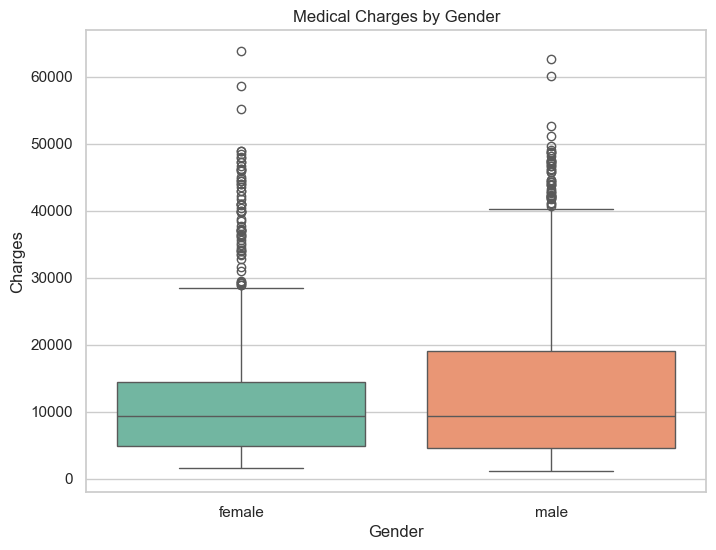

In [24]:
sns.boxplot(x='sex', y='charges', data=df, palette='Set2')
plt.title('Medical Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5352\901288809.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


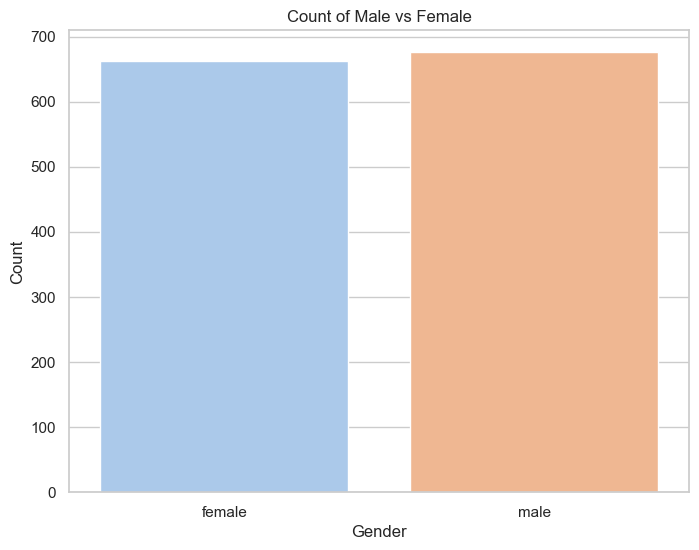

In [25]:
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Count of Male vs Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
